<a href="https://colab.research.google.com/github/macgyver121/DADS5001/blob/main/Exercise/Midterm_DADS5001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question for Test

คำถาม
- มีคนต่างชาติที่มาที่ติดโควิดที่ประเทศไทยเท่าไหร่
- คนที่เดินทางมาจากตต่างประเทศ ประเทศไหนติดโควิดมาจากต้นทางมากที่สุด
- ช่วงอายุไหนติดโควิดมากที่สุด
- ผู้ชายหรือผู้หญิงติดโควิดมากกว่ากัน
- ความเสี่ยงที่ทำให้คนติดเชื้อ 3 อันดับแรก คืออะไร
- ถ้าเราต้องพาพนักงานในบริษัทไปสัมนาที่ต่างจังหวัด โดยพนักงานเสนอจังหวัดดังนี้ เชียงใหม่ ขอนแก่น ภูเก็ต เราจะเลือก
จังหวัดไหนในการสัมนาโดยคำนึงถึงเรื่องโควิดเป็นสำคัญ


# Data preparation

## Import Data

In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
!pwd

/content


In [75]:
import pandas as pd
import numpy as np

In [76]:
df1 = pd.read_csv('/content/drive/MyDrive/DADS/DADS5001/confirmed-cases.csv')
df2 = pd.read_csv('/content/drive/MyDrive/DADS/DADS5001/confirmed-cases-since-120864.csv')
df3 = pd.read_csv('/content/drive/MyDrive/DADS/DADS5001/confirmed-cases-since-271064.csv')
df4 = pd.read_csv('/content/drive/MyDrive/DADS/DADS5001/confirmed-cases-since-280265.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Check info

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839771 entries, 0 to 839770
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   No.                    839771 non-null  int64 
 1   announce_date          839771 non-null  object
 2   Notified date          836976 non-null  object
 3   sex                    784876 non-null  object
 4   age                    763606 non-null  object
 5   Unit                   763746 non-null  object
 6   nationality            755567 non-null  object
 7   province_of_isolation  839499 non-null  object
 8   risk                   838677 non-null  object
 9   province_of_onset      740737 non-null  object
 10  district_of_onset      680992 non-null  object
dtypes: int64(1), object(10)
memory usage: 70.5+ MB


In [13]:
print(df1['No.'].count() + df2['No.'].count() + df3['No.'].count() + df4['No.'].count())

3111655


In [14]:
df = df1.append((df2,df3,df4))

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3111655 entries, 0 to 219256
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   No.                    int64  
 1   announce_date          object 
 2   Notified date          object 
 3   sex                    object 
 4   age                    object 
 5   Unit                   object 
 6   nationality            object 
 7   province_of_isolation  object 
 8   risk                   object 
 9   province_of_onset      object 
 10  district_of_onset      object 
 11  Unnamed: 11            float64
dtypes: float64(1), int64(1), object(10)
memory usage: 308.6+ MB


In [16]:
df.tail(5)

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,Unnamed: 11
219252,3088869,9/3/2022,8/3/2022,ชาย,NaN,NaN,Thailand,นครพนม,ทัณฑสถาน/เรือนจำ,NaN,NaN,NaN
219253,3088870,9/3/2022,8/3/2022,ชาย,NaN,NaN,Burmese,เชียงใหม่,ทัณฑสถาน/เรือนจำ,NaN,NaN,NaN
219254,3088871,9/3/2022,8/3/2022,ชาย,NaN,NaN,Thailand,เชียงใหม่,ทัณฑสถาน/เรือนจำ,NaN,NaN,NaN
219255,3088872,9/3/2022,8/3/2022,ชาย,NaN,NaN,Thailand,เชียงใหม่,ทัณฑสถาน/เรือนจำ,NaN,NaN,NaN
219256,3088873,9/3/2022,8/3/2022,ชาย,29.0,ปี,Burmese,ตาก,ทัณฑสถาน/เรือนจำ,NaN,NaN,NaN


In [17]:
df = df.reset_index()

In [18]:
df.tail(5)

,index,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,Unnamed: 11
3111650,219252,3088869,9/3/2022,8/3/2022,ชาย,NaN,NaN,Thailand,นครพนม,ทัณฑสถาน/เรือนจำ,NaN,NaN,NaN
3111651,219253,3088870,9/3/2022,8/3/2022,ชาย,NaN,NaN,Burmese,เชียงใหม่,ทัณฑสถาน/เรือนจำ,NaN,NaN,NaN
3111652,219254,3088871,9/3/2022,8/3/2022,ชาย,NaN,NaN,Thailand,เชียงใหม่,ทัณฑสถาน/เรือนจำ,NaN,NaN,NaN
3111653,219255,3088872,9/3/2022,8/3/2022,ชาย,NaN,NaN,Thailand,เชียงใหม่,ทัณฑสถาน/เรือนจำ,NaN,NaN,NaN
3111654,219256,3088873,9/3/2022,8/3/2022,ชาย,29.0,ปี,Burmese,ตาก,ทัณฑสถาน/เรือนจำ,NaN,NaN,NaN


## Delete unused column

In [19]:
del df['index']

In [20]:
del df['Unnamed: 11']

In [21]:
df.tail(5)

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
3111650,3088869,9/3/2022,8/3/2022,ชาย,NaN,NaN,Thailand,นครพนม,ทัณฑสถาน/เรือนจำ,NaN,NaN
3111651,3088870,9/3/2022,8/3/2022,ชาย,NaN,NaN,Burmese,เชียงใหม่,ทัณฑสถาน/เรือนจำ,NaN,NaN
3111652,3088871,9/3/2022,8/3/2022,ชาย,NaN,NaN,Thailand,เชียงใหม่,ทัณฑสถาน/เรือนจำ,NaN,NaN
3111653,3088872,9/3/2022,8/3/2022,ชาย,NaN,NaN,Thailand,เชียงใหม่,ทัณฑสถาน/เรือนจำ,NaN,NaN
3111654,3088873,9/3/2022,8/3/2022,ชาย,29.0,ปี,Burmese,ตาก,ทัณฑสถาน/เรือนจำ,NaN,NaN


## check null

In [22]:
df.isnull().sum()

No.                           0
announce_date                 0
Notified date              2795
sex                      170589
age                      256920
Unit                     277092
nationality              268489
province_of_isolation      3956
risk                       1174
province_of_onset        378350
district_of_onset        485107
dtype: int64

## cleaning Data [sex]

In [23]:
df['sex'].value_counts()

หญิง      1546128
ชาย       1394915
นาย             9
หญิิง           5
ช               3
 หญิง           1
ร.ต.ท.          1
หห              1
หญง             1
ญ               1
หณิง            1
Name: sex, dtype: int64

In [24]:
df['sex'] = df['sex'].str.strip()

In [25]:
df['sex'] = df['sex'].replace(['นาย','ช','ร.ต.ท.'], 'ชาย')

In [26]:
df['sex'] = df['sex'].replace(['หญิิง','หห','หญง','ญ','หณิง'], 'ชาย')

In [27]:
df['sex'].value_counts()

หญิง    1546129
ชาย     1394937
Name: sex, dtype: int64

## cleaning Data [age]

In [28]:
age = df['age'].unique()

In [29]:
df[df['age'] == '55/664']

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
100164,100165,16/5/2021,15/5/2021,หญิง,55/664,NaN,Thailand,ภูเก็ต,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,ภูเก็ต,เมือง


In [30]:
df[df['age'] == '35/11']

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
2620435,2597654,14/2/2022,13/2/2022,หญิง,35/11,NaN,Thailand,ประจวบคีรีขันธ์,อยู่ระหว่างการสอบสวน,ประจวบคีรีขันธ์,บางสะพาน


### delete row that age = 55/664, 35/11

In [31]:
df = df.drop(100164)
df = df.drop(2620435)

In [32]:
df['age'] = df['age'].astype(float)

### delete row that age more than 122 (highest human age in the world)

In [33]:
index_age_error = df[df['age'] > 122].index

In [34]:
df = df.drop(index_age_error)

In [35]:
df['age'].sort_values(ascending = False)

2840765    122.0
2841007    122.0
2295985    121.0
2382449    121.0
1823216    119.0
           ...  
3111649      NaN
3111650      NaN
3111651      NaN
3111652      NaN
3111653      NaN
Name: age, Length: 3111643, dtype: float64

### check value

In [36]:
df['age'].value_counts()

25.000000    71153
26.000000    69871
24.000000    69415
30.000000    68444
27.000000    68238
             ...  
54.240166        1
54.280807        1
54.321448        1
54.362089        1
4.300000         1
Name: age, Length: 1215, dtype: int64

In [37]:
df['age'].isna().sum()

256920

## cleaning Data [unit]

In [38]:
df['Unit'] = df['Unit'].str.strip()

In [39]:
df['Unit'].value_counts()

ปี       2821098
เดือน      12627
วัน          835
Name: Unit, dtype: int64

### change person that age is month and day to 0 year

In [40]:
unit_md_index = df[df['Unit'].isin(['เดือน', 'วัน'])].index

In [41]:
df.loc[unit_md_index, 'age'] = 0

In [42]:
df[df['Unit'].isin(['เดือน', 'วัน'])]

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
301,302,20/3/2020,NaN,ชาย,0.0,เดือน,Thailand,ภูเก็ต,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,ภูเก็ต,เมือง
1076,1077,27/3/2020,26/3/2020,ชาย,0.0,เดือน,Thailand,สุราษฎร์ธานี,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,สุราษฎร์ธานี,กาญจนดิษฐ์
1676,1677,1/4/2020,31/3/2020,ชาย,0.0,เดือน,Japan,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,NaN
1988,1989,4/4/2020,3/4/2020,ชาย,0.0,เดือน,Thailand,ระยอง,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,ระยอง,บ้านฉาง
3507,3508,22/9/2020,21/9/2020,ชาย,0.0,เดือน,India,กรุงเทพมหานคร,ผู้ที่เดินทางมาจากต่างประเทศ และเข้า ASQ/ALQ,กรุงเทพมหานคร,พระนคร
...,...,...,...,...,...,...,...,...,...,...,...
3107814,3085033,9/3/2022,8/3/2022,ชาย,0.0,เดือน,Thailand,สตูล,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,สตูล,เมืองพิมาน
3107889,3085108,9/3/2022,8/3/2022,หญิง,0.0,เดือน,Thailand,สตูล,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,สตูล,ควนโดน
3107897,3085116,9/3/2022,8/3/2022,หญิง,0.0,เดือน,Thailand,สตูล,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,สตูล,ควนโดน
3107901,3085120,9/3/2022,8/3/2022,หญิง,0.0,เดือน,Thailand,สตูล,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,สตูล,ควนโดน


In [43]:
df.loc[unit_md_index, 'Unit'] = 'ปี'

In [44]:
df['Unit'].value_counts()

ปี    2834560
Name: Unit, dtype: int64

## cleaning Data [nationality]

### setting show all data 

In [94]:
pd.set_option("display.max_rows", None)

### change to lower text

In [60]:
df['nationality'] = df['nationality'].str.lower()

### delete white space

In [66]:
df['nationality'] = df['nationality'].str.strip()

In [67]:
df['nationality'].head()

0       china
1       china
2    thailand
3       china
4       china
Name: nationality, dtype: object

### change duplicate data

In [100]:
a = df['nationality'].replace(['afghan / afghani','afghanistan'], 'afghan')
a = a.replace(['albania'], 'albanian')
a = a.replace(['algeria'], 'algerian')
a = a.replace(['american samoa'], 'american samoan')
a = a.replace(['americans','อเมริกา'], 'american')
a = a.replace(['arabi'], 'saudi arabian')
a = a.replace(['argentina', 'argentine / argentinian'], 'argentine')
a = a.replace(['armenia'], 'armenian')
a = a.replace(['au', 'australia'], 'australian')
a = a.replace(['austria'], 'austrian')
a = a.replace(['azerbaijan'], 'azerbaijani')
a = a.replace(['bahrain'], 'bahraini')
a = a.replace(['bangladesh'], 'bangladeshi')
a = a.replace(['belarus'], 'belarusian')
a = a.replace(['belgium'], 'belgian')
a = a.replace(['bermuda'], 'bermudain')
a = a.replace(['bhutan'], 'bhutanese')
a = a.replace(['bosnian/herzegovinian'], 'bosnian')
a = a.replace(['brazil', 'บราซิล'], 'brazilian')
a = a.replace(['british / english', 'british / northern irish', 'british / scottish', 'british / welsh', 'british/english'], 'british')
a = a.replace(['brunei'], 'bruneian')
a = a.replace(['bulgaria'], 'bulgarian')
a = a.replace(['burma', 'myanmar', 'พม่า', 'ไทยใหญ่', 'ไทใหญ่'], 'burmese')
a = a.replace(['cambodia', 'กัมพูชา'], 'cambodian')
a = a.replace(['cameroon'], 'cameroonian')
a = a.replace(['canada'], 'canadian')
a = a.replace(['china', 'จีน'], 'chinese')
a = a.replace(['colombia'], 'colombian')
a = a.replace(['congo', 'congo (brazzaville)'], 'congolese')
a = a.replace(['croatia'], 'croatian')
a = a.replace(['cuba'], 'cuban')
a = a.replace(['czechia'], 'czech')

In [107]:
a = a.replace(['denmark'], 'danish')
a = a.replace(['deutsch'], 'german')
a = a.replace(['netherlands'], 'dutch')
a = a.replace(['egypt'], 'egyptian')
a = a.replace(['emirate', 'uae', 'united arab emirates'], 'emirati')
a = a.replace(['eritrea'], 'eritrean')
a = a.replace(['estonia'], 'estonian')
a = a.replace(['ethiopia'], 'ethiopian')
a = a.replace(['philipines'], 'filipino')
a = a.replace(['finland'], 'finnish')
a = a.replace(['franch', 'french guiana'], 'french')
a = a.replace(['gambia', 'gambia, the'], 'gambian')
a = a.replace(['germany', 'germen', 'gremany'], 'german')
a = a.replace(['ghana'], 'ghanaian')
a = a.replace(['greece'], 'greek')
a = a.replace(['guinea'], 'guinean')
a = a.replace(['hong kong'], 'chinese')
a = a.replace(['hungary'], 'hungarian')
a = a.replace(['iceland'], 'icelandic')
a = a.replace(['india', 'india-thailand'], 'indian')
a = a.replace(['indonesia'], 'indonesian')
a = a.replace(['iran'], 'iranian')
a = a.replace(['iraq'], 'iraqi')
a = a.replace(['ireland'], 'irish')
a = a.replace(['israel'], 'israeli')
a = a.replace(['italy'], 'italian')
a = a.replace(['japan'], 'japanese')
a = a.replace(['jordan'], 'jordanian')

In [110]:
a = a.replace(['kazakhstan', 'kazakh / kazakhstani'], 'kazakh')
a = a.replace(['kenya'], 'kenyan')
a = a.replace(['korea, south', 'korean'], 'south korean')
a = a.replace(['kosovo'], 'kosovan')
a = a.replace(['kuwait'], 'kuwaiti')
a = a.replace(['kyrgyzstan'], 'kyrgyz')
a = a.replace(['l', 'lao', 'laos', 'laotian / lao', 'laotian/lao'], 'laotian')
a = a.replace(['latvia'], 'latvian')
a = a.replace(['liberia'], 'liberian')
a = a.replace(['libya'], 'libyan')
a = a.replace(['lithuania'], 'lithuanian')
a = a.replace(['luxembourg'], 'luxembourgish')
a = a.replace(['macedonia'], 'macedonian')
a = a.replace(['malawi'], 'malawin')
a = a.replace(['malaysia'], 'malaysian')
a = a.replace(['maldives'], 'maldivian')
a = a.replace(['mali'], 'malian')
a = a.replace(['malta'], 'maltese')
a = a.replace(['mauritians', 'mauritius'], 'mauritian')
a = a.replace(['mexico'], 'mexican')
a = a.replace(['mongolia'], 'mongolian')
a = a.replace(['namibia'], 'namibian')
a = a.replace(['nepal', 'nepalese / nepali'], 'nepalese')
a = a.replace(['new zealand'], 'new zealander')
a = a.replace(['nicaragua'], 'nicaraguan')
a = a.replace(['nigeria', 'ไนจีเรีย'], 'nigerian')
a = a.replace(['norway'], 'norwegian')

In [112]:
a = a.replace(['oman'], 'omani')
a = a.replace(['pakistan'], 'pakistani')
a = a.replace(['palestine'], 'palestinian')
a = a.replace(['philippines'], 'filipino')
a = a.replace(['poland'], 'polish')
a = a.replace(['portugal'], 'portuguese')
a = a.replace(['qatar', 'oatari'], 'qatari')
a = a.replace(['romania'], 'romanian')
a = a.replace(['russia'], 'russian')
a = a.replace(['senegal'], 'senegalese')
a = a.replace(['serbia'], 'serbian')
a = a.replace(['sierra leone'], 'sierra leonian')
a = a.replace(['singapore'], 'singaporean')
a = a.replace(['slovak / slovakian'], 'slovak')
a = a.replace(['slovenia', 'slovenian / slovene'], 'slovenian')
a = a.replace(['somali / somalian', 'somalia'], 'somali')
a = a.replace(['south africa'], 'south african')
a = a.replace(['south korea'], 'south korean')
a = a.replace(['spain'], 'spanish')
a = a.replace(['sri lanka'], 'sri lankan')
a = a.replace(['sudan'], 'sudanese')
a = a.replace(['swaziland'], 'swazi')
a = a.replace(['sweden', 'สวีเดน'], 'swedish')
a = a.replace(['switzerland'], 'swiss')
a = a.replace(['syria'], 'syrian')
a.groupby(a).size()

nationality
afghan                           18
african                          23
albanian                         13
algerian                          8
american                       1201
american samoan                   5
argentine                        21
armenian                          6
australian                      689
austrian                        176
azerbaijani                       5
bahraini                         21
bangladeshi                     104
belarusian                       44
belgian                         205
bermudain                         1
bhutanese                         4
bosnian                           2
brazilian                       103
british                        1870
bruneian                          5
bulgarian                        54
burmese                      151991
cambodian                     39662
cameroonian                      36
canadian                        295
chilean                          22
chinese         

use this ref to change nationality https://www.englishclub.com/vocabulary/world-countries-nationality.php

------------------------------------------------

## Drop na for all

In [ ]:
df['No.'].count()

3111643

In [ ]:
df_no_na = df.dropna()

In [ ]:
df_no_na['No.'].count()

2252677

## Visualization

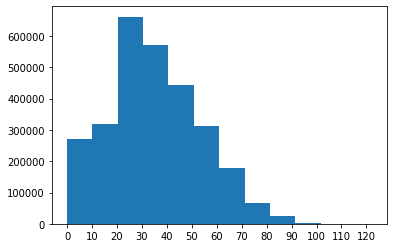

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(df['age'], bins = 12)
plt.xticks(range(0,121,10))
plt.show()

## export Data

In [ ]:
from google.colab import files
df.to_csv('datacovid.csv') 
files.download('datacovid.csv')